In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib

from data_wrangler import get_model_data_for_regression
from models import get_preprocessor, save_model, MODELS, load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import seaborn as sns
sns.set_theme()

FIGURE_PATH = pathlib.Path('../report/figures/out/')
MODEL_PATH = './models/'

data = get_model_data_for_regression(100000, True)
display(data)



,contest_id,roster_slot_id,player_id,entry_count,usage_ratio,season,double_up,draft_group_id,fifty_fifty,guaranteed,...,projection_value_ratio_mean,projection_value_ratio_max,projection_value_ratio_std,salary_vor,projection_vor,projection_value_ratio_vor,salary_vum,projection_vum,projection_value_ratio_vum,log_usage
1534793,169446477,TE,916467,199,0.005025,2024,f,116004,f,t,...,79.203896,141.153846,44.073899,-1.109850,-0.780732,-0.467485,-3.287530,-2.806864,-1.873078,-2.298853
2930633,172201106,FLEX,593587,228,0.026316,2024,t,119279,f,t,...,111.104785,138.125000,17.487619,1.315764,1.179907,0.398103,-0.714736,-1.268366,-1.147002,-1.579784
509195,167224886,FLEX,1175184,11884,0.022888,2024,f,113472,f,t,...,87.717160,174.112903,31.619012,0.651367,0.841925,0.821965,-2.066188,-1.699454,-1.910433,-1.640394
1248428,168945177,FLEX,1123398,98,0.020408,2024,f,115215,f,t,...,93.424134,129.365079,26.746976,1.048491,0.919533,0.476930,-0.752598,-0.800670,-0.866809,-1.690196
266379,166758629,WR,910852,2972,0.009421,2024,f,109136,f,t,...,88.181975,159.166667,31.181181,-0.554702,-0.312900,0.206323,-3.329725,-3.008928,-2.070200,-2.025891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312576,171211734,WR,611417,833,0.024010,2024,f,118052,f,t,...,89.337344,135.961538,30.590232,1.277444,1.006570,0.490059,-1.002997,-0.918626,-1.034094,-1.619615
1000611,168403410,FLEX,1191983,459,0.002179,2024,t,114943,f,t,...,91.780027,129.365079,24.877656,-1.275080,-1.195088,-1.056371,-3.825239,-3.147381,-2.567166,-2.661813
2096970,170705577,FLEX,880151,594,0.005051,2024,f,117285,f,t,...,102.056576,148.600000,23.685433,-0.149302,0.348816,0.898306,-2.417264,-1.763695,-1.066760,-2.296665
986745,168365644,FLEX,837958,5920,0.016047,2024,f,114832,f,t,...,74.180300,131.481481,36.534072,0.035161,0.344776,0.665963,-2.590160,-1.834904,-0.902468,-1.794598


/home/matthew/miniconda3/envs/dfs/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/matthew/miniconda3/envs/dfs/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/matthew/miniconda3/envs/dfs/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RMSE MLP Neural Network = 0.36113981305703613
RMSE LSTM Neural Network = 0.35009591714679994
RMSE Linear Regression = 0.5057238547858187
RMSE Ridge Regression = 0.5057241706872767
RMSE Lasso Regression = 0.5515393170790567
RMSE SKL Gradient Boosting = 0.34700034503383026
RMSE XGBoost = 0.31631838805416773
RMSE LightGBM = 0.34697577857159645
\begin{tabular}{l c}
Model & RMSE \\ \hline
MLP Neural Network & 0.3611 \\
LSTM Neural Network & 0.3501 \\
Linear Regression & 0.5057 \\
Ridge Regression & 0.5057 \\
Lasso Regression & 0.5515 \\
SKL Gradient Boosting & 0.3470 \\
XGBoost & 0.3163 \\
LightGBM & 0.3470 \\
\end{tabular}


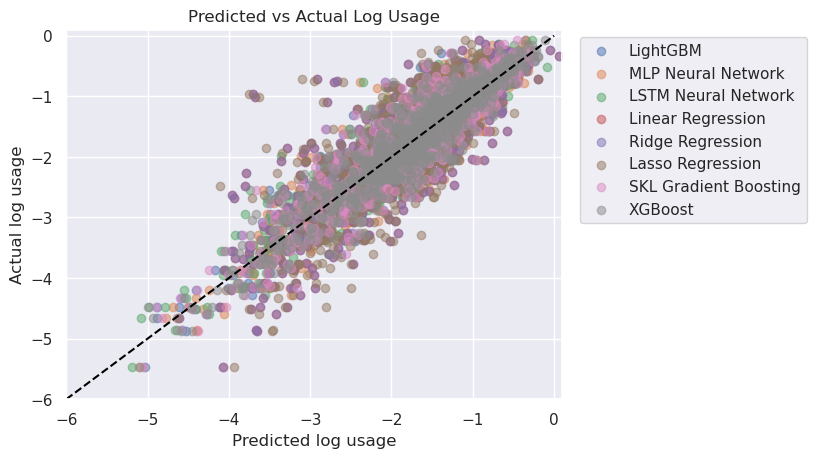

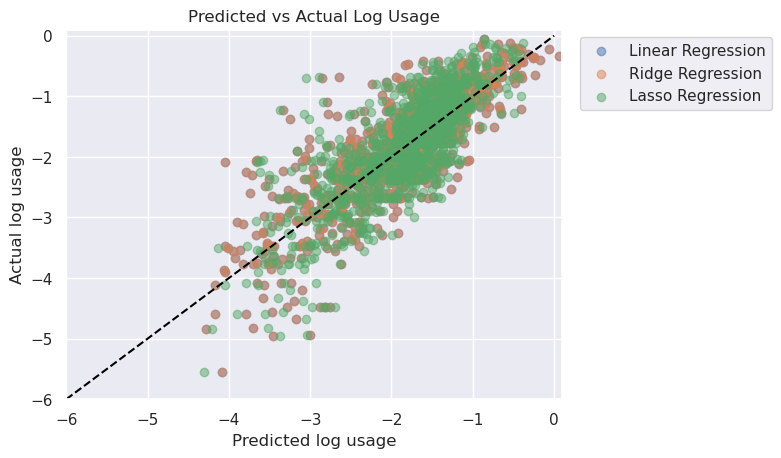

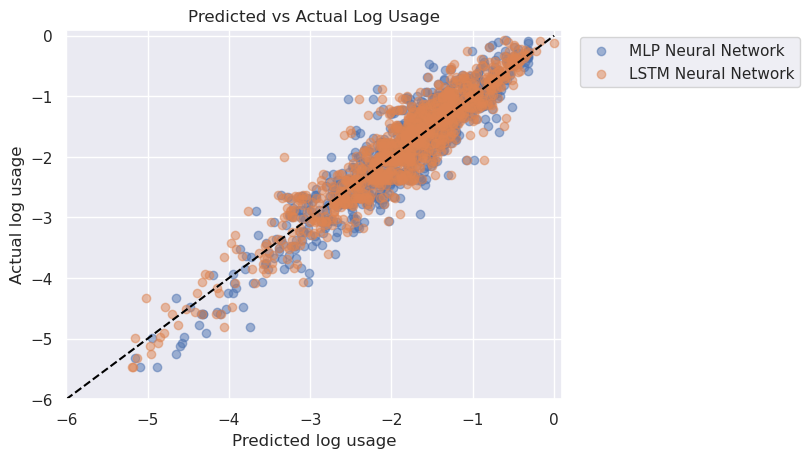

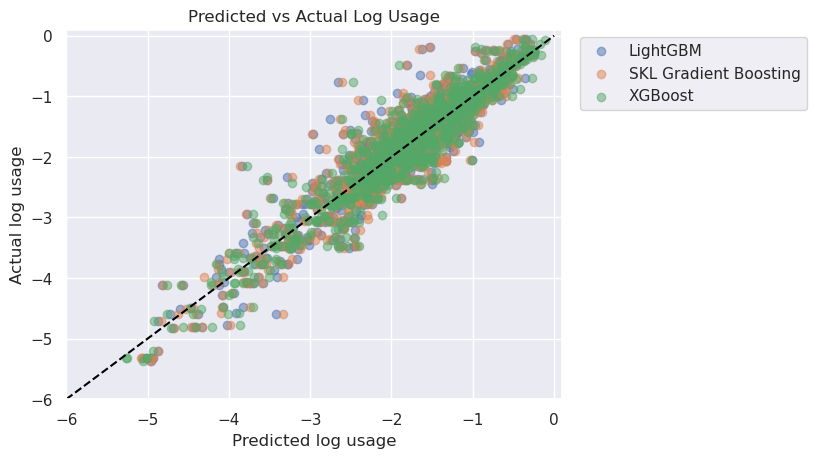

In [5]:
from models import MODELS, PREPROC
if hasattr(MODELS, 'RandomForest'):
    del MODELS['RandomForest']  # Too slow

nn = load_model(MODEL_PATH + 'MLPModel.pkl')
lstm = load_model(MODEL_PATH + 'LSTMNNModel.pkl')
linear = load_model(MODEL_PATH + 'LinearRegression.pkl')
ridge = load_model(MODEL_PATH + 'Ridge.pkl')
lasso = load_model(MODEL_PATH + 'Lasso.pkl')
skl = load_model(MODEL_PATH + 'SKLGradientBoosting.pkl')
xgb = load_model(MODEL_PATH + 'XGBoost.pkl')
lgb = load_model(MODEL_PATH + 'LightGBM.pkl')


test_frac = 0.1
X_train, X_test, y_train, y_test = train_test_split(data, data['log_usage'], test_size=test_frac, random_state=42)


lgb_pred = lgb.predict(X_test)
PREPROC.fit(X_train)
X_test_transformed = PREPROC.transform(X_test)
nn_pred = nn.predict(X_test_transformed)
lstm_pred = lstm.predict(X_test_transformed.reshape((X_test_transformed.shape[0], 1, X_test_transformed.shape[1])))
linear_pred = linear.predict(X_test)
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
skl_pred = skl.predict(X_test)
xgb_pred = xgb.predict(X_test)

print(f'RMSE MLP Neural Network = {root_mean_squared_error(nn_pred, y_test)}')
print(f'RMSE LSTM Neural Network = {root_mean_squared_error(lstm_pred, y_test)}')
print(f'RMSE Linear Regression = {root_mean_squared_error(linear_pred, y_test)}')
print(f'RMSE Ridge Regression = {root_mean_squared_error(ridge_pred, y_test)}')
print(f'RMSE Lasso Regression = {root_mean_squared_error(lasso_pred, y_test)}')
print(f'RMSE SKL Gradient Boosting = {root_mean_squared_error(skl_pred, y_test)}')
print(f'RMSE XGBoost = {root_mean_squared_error(xgb_pred, y_test)}')
print(f'RMSE LightGBM = {root_mean_squared_error(lgb_pred, y_test)}')

# print it as a latex table
print(r'\begin{tabular}{l c}')
print(r'Model & RMSE \\ \hline')
print(f'MLP Neural Network & {root_mean_squared_error(nn_pred, y_test):.4f} \\\\')
print(f'LSTM Neural Network & {root_mean_squared_error(lstm_pred, y_test):.4f} \\\\')
print(f'Linear Regression & {root_mean_squared_error(linear_pred, y_test):.4f} \\\\')
print(f'Ridge Regression & {root_mean_squared_error(ridge_pred, y_test):.4f} \\\\')
print(f'Lasso Regression & {root_mean_squared_error(lasso_pred, y_test):.4f} \\\\')
print(f'SKL Gradient Boosting & {root_mean_squared_error(skl_pred, y_test):.4f} \\\\')
print(f'XGBoost & {root_mean_squared_error(xgb_pred, y_test):.4f} \\\\')
print(f'LightGBM & {root_mean_squared_error(lgb_pred, y_test):.4f} \\\\')
print(r'\end{tabular}')


plt.figure()
idx = np.random.choice(len(X_test), size=1000, replace=False)
plt.scatter(lgb_pred[idx], y_test.iloc[idx], alpha=0.5, label='LightGBM')
plt.scatter(nn_pred[idx], y_test.iloc[idx], alpha=0.5, label='MLP Neural Network')
plt.scatter(lstm_pred[idx], y_test.iloc[idx], alpha=0.5, label='LSTM Neural Network')
plt.scatter(linear_pred[idx], y_test.iloc[idx], alpha=0.5, label='Linear Regression')
plt.scatter(ridge_pred[idx], y_test.iloc[idx], alpha=0.5, label='Ridge Regression')
plt.scatter(lasso_pred[idx], y_test.iloc[idx], alpha=0.5, label='Lasso Regression')
plt.scatter(skl_pred[idx], y_test.iloc[idx], alpha=0.5, label='SKL Gradient Boosting')
plt.scatter(xgb_pred[idx], y_test.iloc[idx], alpha=0.5, label='XGBoost')
plt.plot([-6, 0], [-6, 0], color='black', linestyle='--')
plt.xlim([-6, 0.1])
plt.ylim([-6, 0.1])
plt.xlabel('Predicted log usage')
plt.ylabel('Actual log usage')
plt.title('Predicted vs Actual Log Usage')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.savefig(FIGURE_PATH / 'predicted_vs_actual_log_usage.png', bbox_inches='tight', dpi=300)

plt.figure()
idx = np.random.choice(len(X_test), size=1000, replace=False)
plt.scatter(linear_pred[idx], y_test.iloc[idx], alpha=0.5, label='Linear Regression')
plt.scatter(ridge_pred[idx], y_test.iloc[idx], alpha=0.5, label='Ridge Regression')
plt.scatter(lasso_pred[idx], y_test.iloc[idx], alpha=0.5, label='Lasso Regression')
plt.plot([-6, 0], [-6, 0], color='black', linestyle='--')
plt.xlim([-6, 0.1])
plt.ylim([-6, 0.1])
plt.xlabel('Predicted log usage')
plt.ylabel('Actual log usage')
plt.title('Predicted vs Actual Log Usage')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

plt.figure()
idx = np.random.choice(len(X_test), size=1000, replace=False)
plt.scatter(nn_pred[idx], y_test.iloc[idx], alpha=0.5, label='MLP Neural Network')
plt.scatter(lstm_pred[idx], y_test.iloc[idx], alpha=0.5, label='LSTM Neural Network')
plt.plot([-6, 0], [-6, 0], color='black', linestyle='--')
plt.xlim([-6, 0.1])
plt.ylim([-6, 0.1])
plt.xlabel('Predicted log usage')
plt.ylabel('Actual log usage')
plt.title('Predicted vs Actual Log Usage')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

plt.figure()
idx = np.random.choice(len(X_test), size=1000, replace=False)
plt.scatter(lgb_pred[idx], y_test.iloc[idx], alpha=0.5, label='LightGBM')
plt.scatter(skl_pred[idx], y_test.iloc[idx], alpha=0.5, label='SKL Gradient Boosting')
plt.scatter(xgb_pred[idx], y_test.iloc[idx], alpha=0.5, label='XGBoost')
plt.plot([-6, 0], [-6, 0], color='black', linestyle='--')
plt.xlim([-6, 0.1])
plt.ylim([-6, 0.1])
plt.xlabel('Predicted log usage')
plt.ylabel('Actual log usage')
plt.title('Predicted vs Actual Log Usage')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()